In [48]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
from omegaconf import DictConfig
import os
import matplotlib.pyplot as plt

import vsa_ogm.dataloaders.functional as hogmf

plt.rcParams['text.usetex'] = True

In [50]:
data_config: DictConfig = DictConfig({
    "data": {
        "dataset_name": "toysim", # toysim, intel
        "toysim": {
            "data_dir": os.path.expanduser("~") + "/dev/highfrost/highfrost/ogm/datasets/single/toysim0/npz",
            "file_prefix": "results_frame_",
            "file_suffix": ".npz",
            "world_bounds": [-50, 50, -50, 50] # x_min, x_max, y_min, y_max; meters
        },
    },
    "verbose": True,
})

In [51]:
data_loader, world_size = hogmf.load_single_data(data_config)

Loading Data...


In [52]:
print(f"Number of Point Clouds: {data_loader.max_steps()}")

Number of Point Clouds: 89


In [53]:
batch = data_loader.reset()

num_points: int = 0
num_occupied: int = 0
num_empty: int = 0

while data_loader.time_step < data_loader.max_steps():

    num_points += batch["lidar_data"].shape[0]
    num_occupied += batch["lidar_data"][batch["occupancy"] == 1].shape[0]
    num_empty += batch["lidar_data"][batch["occupancy"] == 0].shape[0]

    batch = data_loader.step()

In [54]:
print(f"Number of Points: {num_points}")
print(f"Number of Occupied Points: {num_occupied}")
print(f"Number of Empty Points: {num_empty}")
print(f"Percent Occupied: {num_occupied / num_points}%")
print(f"Percent Empty: {num_empty / num_points}%")

Number of Points: 4450
Number of Occupied Points: 2674
Number of Empty Points: 1776
Percent Occupied: 0.6008988764044944%
Percent Empty: 0.3991011235955056%


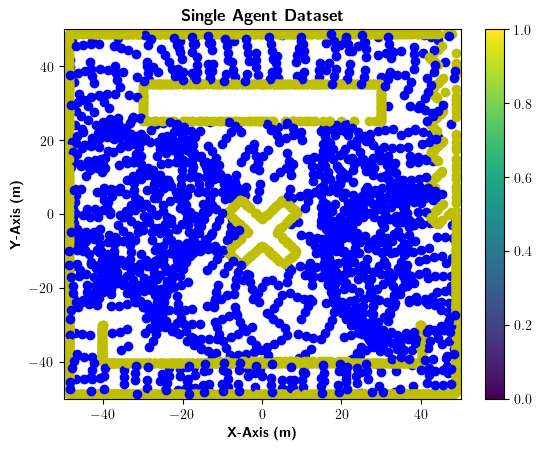

In [55]:
batch = data_loader.reset()

plt.figure()
plt.xlim(data_config.data.toysim.world_bounds[0], data_config.data.toysim.world_bounds[1])
plt.ylim(data_config.data.toysim.world_bounds[2], data_config.data.toysim.world_bounds[3])
plt.title(r"\textbf{Single Agent Dataset}")
plt.xlabel(r"\textbf{X-Axis (m)}")
plt.ylabel(r"\textbf{Y-Axis (m)}")

while data_loader.time_step < data_loader.max_steps():
    occupied_points = batch["lidar_data"][batch["occupancy"] == 1]
    empty_points = batch["lidar_data"][batch["occupancy"] == 0]

    plt.scatter(empty_points[:, 0], empty_points[:, 1], c="b")
    plt.scatter(occupied_points[:, 0], occupied_points[:, 1], c="y")

    batch = data_loader.step()

plt.colorbar()
plt.savefig("single_agent_dataset.png", dpi=300)
plt.show()